# Life Expectancy vs GDP

## Import Dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

## Read in Data
le_gdp = pd.read_csv("all_data.csv")
display(le_gdp.head())

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Explore Countries

In [3]:
country_list = le_gdp['Country'].unique()
print(country_list)

# Verify that we have the same number of years for each country
for country in country_list:
    print("The data set has " + str(len(le_gdp.loc[le_gdp['Country'] == country])) + " entries for " + country)
# Verify that the years for each country are the same
    print("Years for " + country +":")
    print(le_gdp['Year'].loc[le_gdp['Country'] == country])

print(16 * len(country_list))
print(len(le_gdp))

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
The data set has 16 entries for Chile
Years for Chile:
0     2000
1     2001
2     2002
3     2003
4     2004
5     2005
6     2006
7     2007
8     2008
9     2009
10    2010
11    2011
12    2012
13    2013
14    2014
15    2015
Name: Year, dtype: int64
The data set has 16 entries for China
Years for China:
16    2000
17    2001
18    2002
19    2003
20    2004
21    2005
22    2006
23    2007
24    2008
25    2009
26    2010
27    2011
28    2012
29    2013
30    2014
31    2015
Name: Year, dtype: int64
The data set has 16 entries for Germany
Years for Germany:
32    2000
33    2001
34    2002
35    2003
36    2004
37    2005
38    2006
39    2007
40    2008
41    2009
42    2010
43    2011
44    2012
45    2013
46    2014
47    2015
Name: Year, dtype: int64
The data set has 16 entries for Mexico
Years for Mexico:
48    2000
49    2001
50    2002
51    2003
52    2004
53    2005
54    2006
55    2007
56    20

## Explore Years

In [4]:
print(le_gdp['Year'].unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


## Calculate Average Life Expectancy for Each Country in a Given Year

In [5]:
index = 0
life_expectancy = []
for country in country_list:
    print(le_gdp['Life expectancy at birth (years)'].loc[le_gdp['Country'] == country].mean())
    life_expectancy.append(le_gdp['Life expectancy at birth (years)'].loc[le_gdp['Country'] == country].mean())
print(life_expectancy)



78.94374999999998
74.26249999999999
79.65625
75.71875
78.0625
50.09375000000001
[78.94374999999998, 74.26249999999999, 79.65625, 75.71875, 78.0625, 50.09375000000001]


## Create Country/Average Life Expectancy Dictionary

In [6]:
country_le_avg_dict = dict(zip(country_list, life_expectancy))
print(country_le_avg_dict)

{'Chile': 78.94374999999998, 'China': 74.26249999999999, 'Germany': 79.65625, 'Mexico': 75.71875, 'United States of America': 78.0625, 'Zimbabwe': 50.09375000000001}


## Plot Life Expectancy vs GDP for all Countries on One Graph

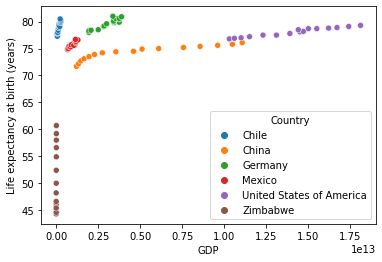

<Figure size 432x288 with 0 Axes>

In [7]:
sns.scatterplot(x = 'GDP', y = 'Life expectancy at birth (years)', hue = 'Country', data = le_gdp)
plt.show()
plt.clf()
## Pretty much useless because GDP data are for the entire country not per capita :(

## Make a Plot for Each Country

   Country  Year  Life expectancy at birth (years)           GDP
0    Chile  2000                              77.3  7.786093e+10
1    Chile  2001                              77.3  7.097992e+10
2    Chile  2002                              77.8  6.973681e+10
3    Chile  2003                              77.9  7.564346e+10
4    Chile  2004                              78.0  9.921039e+10
5    Chile  2005                              78.4  1.229650e+11
6    Chile  2006                              78.9  1.547880e+11
7    Chile  2007                              78.9  1.736060e+11
8    Chile  2008                              79.6  1.796380e+11
9    Chile  2009                              79.3  1.723890e+11
10   Chile  2010                              79.1  2.185380e+11
11   Chile  2011                              79.8  2.522520e+11
12   Chile  2012                              79.9  2.671220e+11
13   Chile  2013                              80.1  2.783840e+11
14   Chile  2014         

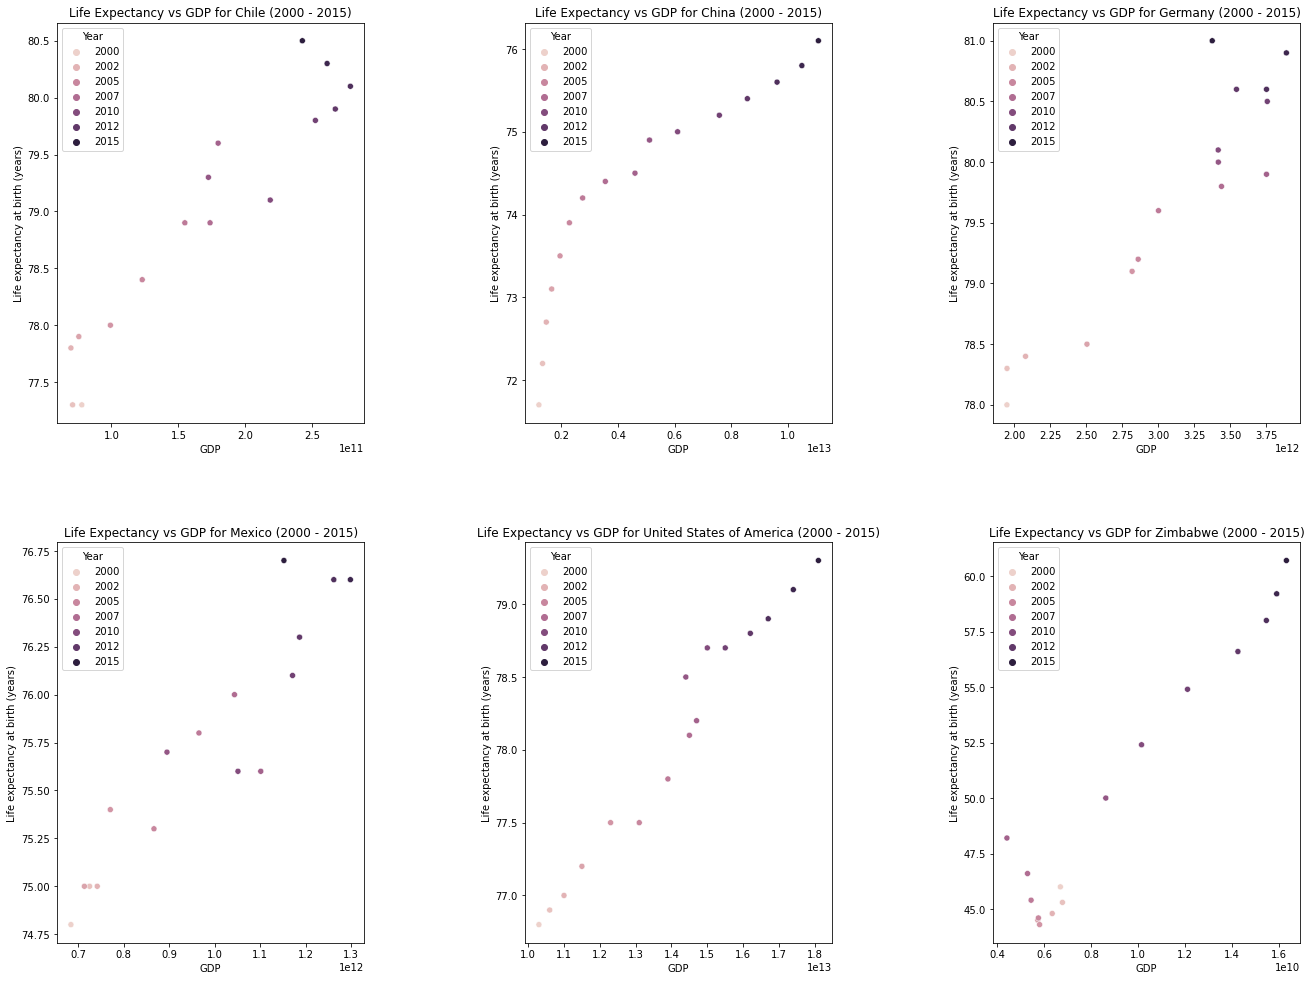

In [22]:
fig, axes = plt.subplots(nrows = 2, ncols = 3)
fig.tight_layout()
axes = axes.ravel()
index = 0
print(le_gdp[le_gdp["Country"] == 'Chile'])
for country in country_list:
    sns.scatterplot(x = 'GDP', y = 'Life expectancy at birth (years)', data = le_gdp[le_gdp['Country'] == country],hue = 'Year', ax = axes[index])
    axes[index].set_title("Life Expectancy vs GDP for " + country + " (2000 - 2015)")
    index += 1
fig.set_size_inches(w=20, h=15, forward=True)